<h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO 213: Data Science Programming II</h2>
<h3 style = "text-align:center">Assignment 2</h3>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Sunday, July 22, 2018</div>
This assignment counts for 15% of the final grade
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR NAME BELOW</h3>

### NAME: Linh Mai


### A. Assignment Overview
This assignment provides the opportunity for you to practice with the data science in Python. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

### F. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

1. Write a good comment for each variable, each method, each control branch, and each loop. 
2. Your method comments must mention the purpose of each parameter, and must be grammatically correct.  

### G. Data Sets

This assignment needs the data sets specified in the questions.

### H. Answer the following questions

## Question 1:

Implement the core function `knn_classify(k, labeled_points, new_point)` for KNN classification algorithm. Your implementation may use the `distance(v, w)` and `majority_vote_weighted(labels, distances)` functions you implemented in Assignment 1. Copy or import from Assignment 1 all the functions that are required here. Test the algorithm using the Iris Flower data set. I have extracted the training data and test set as `labeled_points` and `new_points`. The `labeled_points` set contains 120 instances. The `new_points` set contains 30 instances for testing. Evaluate the implemented algorithm using the set of `new_points` in terms of accuracy, recall, precision, and F1-score. Use different k values to evaluate the algorithm.

In [15]:
# import or copy from Assignment 1 all the methods needed here.
import math, random
from collections import defaultdict, Counter

def majority_vote_weighted(labels, distances):
    #print(distances)
    
    #candidates = []
    #for i in range(0,len(distances)):
    #    if distances[i]==0:
    #        candidates.append(labels[i])
    #if len(candidates)!=0:
    #    return random.choice(candidates)
            
    
    weights = [1/x for x in distances]
            
    label_weight = defaultdict(float)
    for i, l in enumerate(labels):
        label_weight[l] = label_weight[l] + weights[i]
    counts = Counter(labels)
    
    for l in label_weight:
        label_weight[l] = label_weight[l] / counts[l]
    
    max_weight = max(label_weight.values())
    
    candidates = []
    for l in label_weight:
        if label_weight[l] == max_weight:
            candidates.append(l)
    if len(candidates) == 1:
        return candidates[0]
    else:
        return random.choice(candidates)

In [16]:
def vector_subtract(v, w):
    """
    subtracts two vectors componentwise
    INPUT: v, w are two vectors of numbers in the same length
    OUTPUT: a vector containing the subtractions of the corresponding elements in v and w
    """
    return [v_i - w_i for v_i, w_i in zip(v,w)]


In [17]:
def dot(v, w):
    """
    computes the dot product of two vectors
    INPUT: v and w are two vectors of numbers in the same length
    OUTPUT: the dot product of v and w as defined as
            v_1 * w_1 + ... + v_n * w_n
    """
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [18]:
import math
def sum_of_squares(v):
    """
    computes the sum of squares of the elements in a vector
    INPUT: v is a vector of numbers
    OUTPUT: the sum of squares of the elements in v as defined as
            v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [19]:
def squared_distance(v, w):
    """
    computes the squared distance between two vectors
    INPUT: v and w are two vectors of numbers in the same length
    OUTPUT: squared distance between v and w
    """
    return sum_of_squares(vector_subtract(v, w))


In [20]:
def distance(v, w):
    """
    computes the Euclidean distance between two vectors
    INPUT: v and w are two vectors of numbers in the same length
    OUTPUT: the Euclidean distance between v and w
    """
    return math.sqrt(squared_distance(v, w))


In [21]:
#from scipy.spatial import distance
def knn_classify(k, labeled_points, new_point):
    """
    classifies the new_point by a KNN algorithm using majority_vote_weighted()
    INPUT:
        k: number of neighbors used for classification
        labeled_points: a set of training instances each of which should be a pair (point, label)
        new_point: a new instance under clasification; a point is simply a list of numbers
    OUTPUT:
        label: the classified lable for the new_point
    """

    # compute the distances from the new point to each labeled_point
    labels = []
    distances = []
    
    ###############YOUR CODE HERE##################
    # order the labeled points from nearest to farthest
    #print(labeled_points[0])
    sorted_labeled_points = list(sorted(labeled_points, key=lambda point_label: distance(point_label[0], new_point)))
    #print(sorted_labeled_points)
    for labeled_point in sorted_labeled_points:
        dist = distance(labeled_point[0], new_point)
        distances.append(dist+0.000000001)
        labels.append(labeled_point[1])
   
    ##############################################
    # and let them vote
    return majority_vote_weighted(labels[:k], distances[:k])

### Test
The following tests the function `knn_classify(k, labeled_points, new_point)`

In [22]:
import pandas as pd
iris_df = pd.read_csv("Iris.csv")
X = iris_df.iloc[:, 1:-1]
y = iris_df.Species

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

labeled_points = []
for i in range(X_train.shape[0]):
    point = X_train.iloc[i]
    label = y_train.iloc[i]
    labeled_points.append((list(point), label))

new_points = []
for i in range(X_test.shape[0]):
    new_points.append(list(X_test.iloc[i]))

### Evaluation

In [23]:
y_pred = []
for new_point in new_points:
    #lab = 'test' # comment out this when test; use the following statement
    lab = knn_classify(5, labeled_points, new_point)
    y_pred.append(lab)

In [24]:
y_pred_series = pd.Series(y_pred)

In [25]:
y_test.index = range(y_test.shape[0])

In [26]:
print("The classification accuracy: ", sum(y_test == y_pred_series)/len(y_test))

The classification accuracy:  1.0


In [27]:
tp = sum((y_test == 'Iris-versicolor') & (y_pred_series == 'Iris-versicolor'))

fn = sum((y_test == 'Iris-versicolor') & (y_pred_series != 'Iris-versicolor'))

fp= sum((y_test  != 'Iris-versicolor') & (y_pred_series == 'Iris-versicolor'))

tn = sum((y_test != 'Iris-versicolor') & (y_pred_series != 'Iris-versicolor'))

print("recall for class 'Iris-versicolor' = " + str(tp / (tp + fn)))
print("precision for class 'Iris-versicolor' = " + str(tp / (tp + fp)))
print("F1 Score for class 'Iris-versicolor' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'Iris-versicolor' = 1.0
precision for class 'Iris-versicolor' = 1.0
F1 Score for class 'Iris-versicolor' = 1.0


In [28]:
tp = sum((y_test == 'Iris-setosa') & (y_pred_series == 'Iris-setosa'))

fn = sum((y_test == 'Iris-setosa') & (y_pred_series != 'Iris-setosa'))

fp= sum((y_test  != 'Iris-setosa') & (y_pred_series == 'Iris-setosa'))

tn = sum((y_test != 'Iris-setosa') & (y_pred_series != 'Iris-setosa'))

print("recall for class 'Iris-setosa' = " + str(tp / (tp + fn)))
print("precision for class 'Iris-setosa' = " + str(tp / (tp + fp)))
print("F1 Score for class 'Iris-setosa' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'Iris-setosa' = 1.0
precision for class 'Iris-setosa' = 1.0
F1 Score for class 'Iris-setosa' = 1.0


In [29]:
tp = sum((y_test == 'Iris-virginica') & (y_pred_series == 'Iris-virginica'))

fn = sum((y_test == 'Iris-virginica') & (y_pred_series != 'Iris-virginica'))

fp= sum((y_test  != 'Iris-virginica') & (y_pred_series == 'Iris-virginica'))

tn = sum((y_test != 'Iris-virginica') & (y_pred_series != 'Iris-virginica'))

print("recall for class 'Iris-virginica' = " + str(tp / (tp + fn)))
print("precision for class 'Iris-virginica' = " + str(tp / (tp + fp)))
print("F1 Score for class 'Iris-virginica' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'Iris-virginica' = 1.0
precision for class 'Iris-virginica' = 1.0
F1 Score for class 'Iris-virginica' = 1.0


### Your Evaluation
You are encouraged to use different k values to evaluate the performance.

In [30]:
y_pred = []
for new_point in new_points:
    #lab = 'test' # comment out this when test; use the following statement
    lab = knn_classify(2, labeled_points, new_point)
    y_pred.append(lab)

In [31]:
y_pred_series = pd.Series(y_pred)

In [32]:
y_test.index = range(y_test.shape[0])

In [33]:
print("The classification accuracy: ", sum(y_test == y_pred_series)/len(y_test))

The classification accuracy:  1.0


In [34]:
tp = sum((y_test == 'Iris-versicolor') & (y_pred_series == 'Iris-versicolor'))

fn = sum((y_test == 'Iris-versicolor') & (y_pred_series != 'Iris-versicolor'))

fp= sum((y_test  != 'Iris-versicolor') & (y_pred_series == 'Iris-versicolor'))

tn = sum((y_test != 'Iris-versicolor') & (y_pred_series != 'Iris-versicolor'))

print("recall for class 'Iris-versicolor' = " + str(tp / (tp + fn)))
print("precision for class 'Iris-versicolor' = " + str(tp / (tp + fp)))
print("F1 Score for class 'Iris-versicolor' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'Iris-versicolor' = 1.0
precision for class 'Iris-versicolor' = 1.0
F1 Score for class 'Iris-versicolor' = 1.0


In [35]:
tp = sum((y_test == 'Iris-setosa') & (y_pred_series == 'Iris-setosa'))

fn = sum((y_test == 'Iris-setosa') & (y_pred_series != 'Iris-setosa'))

fp= sum((y_test  != 'Iris-setosa') & (y_pred_series == 'Iris-setosa'))

tn = sum((y_test != 'Iris-setosa') & (y_pred_series != 'Iris-setosa'))

print("recall for class 'Iris-setosa' = " + str(tp / (tp + fn)))
print("precision for class 'Iris-setosa' = " + str(tp / (tp + fp)))
print("F1 Score for class 'Iris-setosa' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'Iris-setosa' = 1.0
precision for class 'Iris-setosa' = 1.0
F1 Score for class 'Iris-setosa' = 1.0


In [36]:
tp = sum((y_test == 'Iris-virginica') & (y_pred_series == 'Iris-virginica'))

fn = sum((y_test == 'Iris-virginica') & (y_pred_series != 'Iris-virginica'))

fp= sum((y_test  != 'Iris-virginica') & (y_pred_series == 'Iris-virginica'))

tn = sum((y_test != 'Iris-virginica') & (y_pred_series != 'Iris-virginica'))

print("recall for class 'Iris-virginica' = " + str(tp / (tp + fn)))
print("precision for class 'Iris-virginica' = " + str(tp / (tp + fp)))
print("F1 Score for class 'Iris-virginica' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'Iris-virginica' = 1.0
precision for class 'Iris-virginica' = 1.0
F1 Score for class 'Iris-virginica' = 1.0


## Question 2
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. 

The goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We've curated small sets of data for training and testing. The file digits-4k.csv contains 4000 hand-written digit images for training, while digits-2h.csv contains 200 digit images for testing. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Each data set has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Use the KNN classifier in the Sciket Learn package to classify the 200 images in the test set (using the 4000 instances in digits-4k.csv as the training data). The KNN classifier can be imported as sklearn.neighbors.KNeighborsClassifier. 

Write a program to evaluate the KNN classifier with k ranging from 1 to 15. Plot the scores of the classifier against the range of k values.

Discuss the results, for example, any thoughts on improving the accuracy?

In [37]:
train_4k = pd.read_csv("digits-4k.csv")

In [38]:
test_2h = pd.read_csv("digits-2h.csv")

In [39]:
from sklearn.neighbors import KNeighborsClassifier

#### Build, test, plot the results below

In [40]:
X_train = train_4k.iloc[:,1:]

In [41]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X_test = test_2h.iloc[:,1:]

In [43]:
y_train = train_4k.label

In [44]:
y_test = test_2h.label

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

%matplotlib inline

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,16)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, p = 3)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
print(scores)

[0.945, 0.925, 0.92, 0.935, 0.925, 0.92, 0.92, 0.925, 0.92, 0.925, 0.93, 0.92, 0.92, 0.92, 0.92]


Text(0,0.5,'Testing Accuracy')

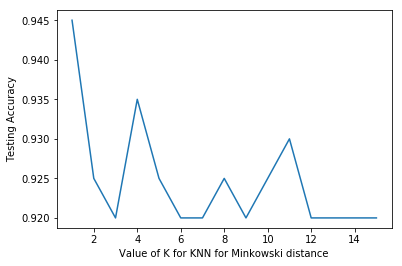

In [47]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN for Minkowski distance')
plt.ylabel('Testing Accuracy')

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,16)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, p = 1)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
print(scores)

[0.92, 0.895, 0.9, 0.9, 0.915, 0.92, 0.91, 0.925, 0.915, 0.91, 0.915, 0.905, 0.9, 0.905, 0.895]


Text(0,0.5,'Testing Accuracy')

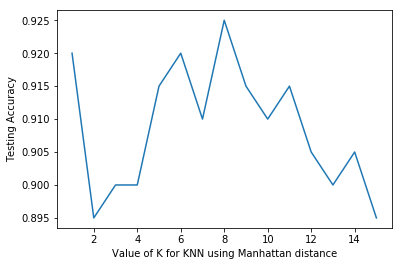

In [49]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN using Manhattan distance')
plt.ylabel('Testing Accuracy')

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,16)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, p = 2)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
print(scores)

[0.935, 0.905, 0.91, 0.92, 0.92, 0.91, 0.92, 0.925, 0.925, 0.925, 0.925, 0.91, 0.91, 0.905, 0.915]


Text(0,0.5,'Testing Accuracy')

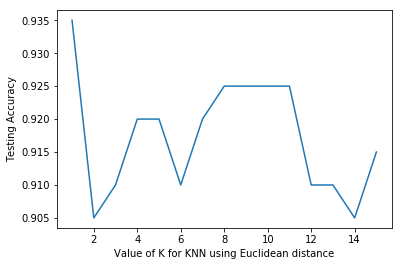

In [51]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN using Euclidean distance')
plt.ylabel('Testing Accuracy')

### Discussion about the result

From the result, we can see that with the k neighbor = 1, the accuracy will be highest. However, after that point, the K neighbor cannot be used to predict the accuracy of the data. 
From the three different graphs above, we can see that the accuracy using the Minkowski distance will be the highest with the value of 0.945. Thus, changing the distance calculation method will increase the accuracy of the algorithm.  
